In [121]:
# for good measure
%config Completer.use_jedi = False

In [122]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

from ml_algorithms.svm import SVM

In [123]:
X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1, random_state=42)
y = np.where(y == 0, -1, 1)

In [124]:
svm_clf = SVM(n_iters=10000)
svm_clf.fit(X, y)

In [125]:
print(svm_clf.weights, svm_clf.bias)

[ 0.63545716 -0.21720213] -0.4000000000000002


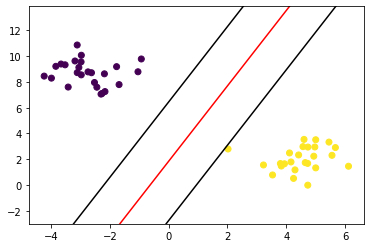

In [126]:
def get_hyperplane(x, w, b, offset):
    return (-w[0] * x + b + offset) / w[1]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

x0_1 = np.amin(X[:, 0])
x0_2 = np.amax(X[:, 0])

x1_1 = get_hyperplane(x0_1, svm_clf.weights, svm_clf.bias, 0)
x1_2 = get_hyperplane(x0_2, svm_clf.weights, svm_clf.bias, 0)
x1_1_m = get_hyperplane(x0_1, svm_clf.weights, svm_clf.bias, -1)
x1_2_m = get_hyperplane(x0_2, svm_clf.weights, svm_clf.bias, -1)
x1_1_p = get_hyperplane(x0_1, svm_clf.weights, svm_clf.bias, 1)
x1_2_p = get_hyperplane(x0_2, svm_clf.weights, svm_clf.bias, 1)

ax.plot([x0_1, x0_2], [x1_1, x1_2], "r")
ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])

plt.show()